In [1]:
from sklearn.datasets import load_boston
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.cluster import DBSCAN

In [2]:
data = pd.read_csv(load_boston()['filename'], skiprows=1)
#print(load_boston()['DESCR'])

In [3]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


- CRIM     per capita crime rate by town   
(индекс преступности на душу населения)  
- ZN       proportion of residential land zoned for lots over 25,000 sq.ft.  
(доля жилой земли, зонированной для участков площадью более 25 000 кв. футов)  
- INDUS    proportion of non-retail business acres per town  
(доля акров нетоварного бизнеса в городе)  
- CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)  
(фиктивная переменная реки Чарльз (= 1, участок ограничен рекой; 0 в противном случае))  
- NOX      nitric oxides concentration (parts per 10 million)  
(концентрация оксидов азота (частей на 10 миллионов))  
- RM       average number of rooms per dwelling  
(среднее количество комнат в одном жилом помещении)  
- AGE      proportion of owner-occupied units built prior to 1940  
(доля квартир, занятых владельцами, построенных до 1940 года)  
- DIS      weighted distances to five Boston employment centres  
(взвешенные расстояния до пяти бостонских центров занятости)  
- RAD      index of accessibility to radial highways  
(индекс доступности к радиальным магистралям)  
- TAX      full-value property-tax rate per 10,000  
(ставка налога на недвижимость по полной стоимости за 10 000 долларов США)   
- PTRATIO  pupil-teacher ratio by town  
(соотношение учащихся и учителей по городам(по районам?))  
- B        1000(Bk - 0.63)^2 where Bk is the proportion of black people by town  
(1000(Bk - 0,63)^2, где Bk-доля чернокожих по городам(районам?))    
- LSTAT    % lower status of the population  
(% более низкий статус населения)  
- MEDV     Median value of owner-occupied homes in 1000's  
(Средняя стоимость домов, занятых владельцами, в 1000 долларов США)

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


`смотрим на датасет и видим, что:`  
` - пропущенных значений нет`  
 `- категориальные переменные CHAS и RAD, остальные переменные непрерывные`  
 `- целевая переменная MEDV непрерывная`

In [5]:
data['RAD'].unique() #RAD - порядковая категориальная переменная

array([ 1,  2,  3,  5,  4,  8,  6,  7, 24])

In [6]:
#---------------------------------------------------

In [7]:
#выбор метрик для оценки
#R^2, коэффициент детерминации - сравним нашу модель с простейшей моделью (предсказание средней величины 
#целевой переменной)
#MSE, средняя квадратическая ошибка (берем корень из нее, чтобы была поменьше :)))
#MAE, средняя абсолютная ошибка - если есть выбросы, то она сгладит недостатки MSE

#функция подсчета ошибок
def model_metrics(y_true, y_pred, text = None):
    mse = round(mean_squared_error(y_true, y_pred, squared = False), 4)
    mae = round(mean_absolute_error(y_true, y_pred), 4)
    r2 = round(r2_score(y_true, y_pred), 4)
    if text != None:
        print(f'{text}:  MSE {mse},  MAE {mae},  R^2 {r2}')
    else:
        print(f'MSE {mse},  MAE {mae},  R^2 {r2}')
    return mse, mae, r2, text

#массив для накопления данных об ошибках по вариантам
metrics = {}

#такой себе pipeline
def evaluating_the_model(X, Y, scal = False, text = None):
    #разбиваем данные на тренировочный и тестовый сэмплы
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
    #проводим нормализацию по требованию
    if scal == True:
        X_tr = StandardScaler().fit_transform(X_train)
        X_t = StandardScaler().fit_transform(X_test)
    else:
        X_tr = X_train
        X_t = X_test
    #создам экземпляр класса LinearRegression, тренируем модель и получаем предсказание
    predictions = LinearRegression(normalize = False).fit(X_tr, y_train).predict(X_t)
    #считаем, выводим и фиксируем метрики
    mse, mae, r2, text = model_metrics(y_test, predictions, text)
    metrics[text] = {'MSE':mse, 'MAE':mae, 'R^2':r2}
    
    pass

#рисуем гистограммы и боксплоты
def hist_boxplots(df):
    for feature in df.columns:
        if feature not in ['RAD', 'CHAS', 'ZN']: 
            plt.figure(figsize=(15, 3))
            sns.set_theme(style = "whitegrid")
            #распределение переменных
            plt.subplot(1, 3, 1)
            sns.histplot(x = df[feature], kde = True, fill = True, bins = 30)
            #распределение логарифмов переменных
            plt.subplot(1, 3, 2)
            sns.histplot(x = np.log(df[feature]), kde = True, fill = True, bins = 30)
            #боксплот
            plt.subplot(1, 3, 3)
            sns.boxplot(x = np.log(df[feature]))
            plt.show()
    pass

#нормализация
def minmaxscaling(column, mean_, min_, max_):
    return (column - mean_) / (max_ - min_)
def standardscaling(column, mean_, std_):
    return (column - mean_) / std_

`-------------------------------------------------------------------------------------------------------------------`

In [8]:
#данные без препроцессинга
X = data.drop(['MEDV'], axis = 1)
Y = data['MEDV']
print(f'Размерность массивов: {X.shape, Y.shape}')
#В1 - "в лоб"
evaluating_the_model(X, Y, scal = False, text = 'В1 - "в лоб"')
#В2 - "в лоб" с нормализацией
evaluating_the_model(X, Y, scal = True, text = 'В2 - "в лоб" с нормализацией')

Размерность массивов: ((506, 13), (506,))
В1 - "в лоб":  MSE 4.9286,  MAE 3.1891,  R^2 0.6688
В2 - "в лоб" с нормализацией:  MSE 5.2352,  MAE 3.8526,  R^2 0.6263


`не понимаю, почему R^2 ухудшился после нормализации X`

`-------------------------------------------------------------------------------------------------------------------`

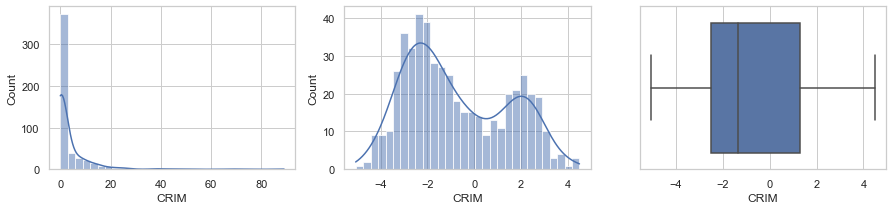

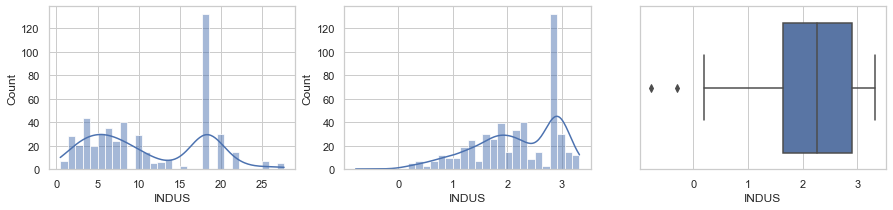

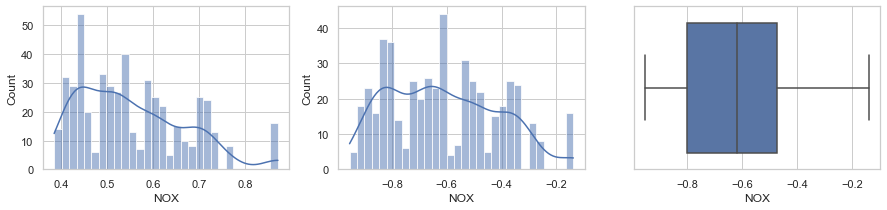

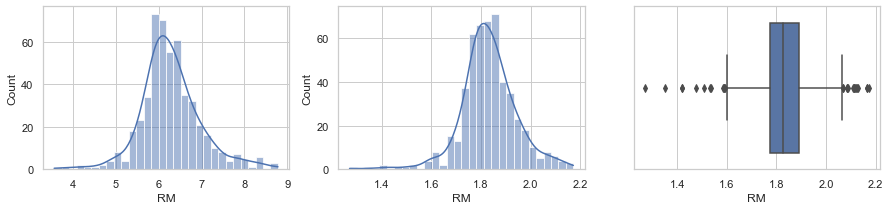

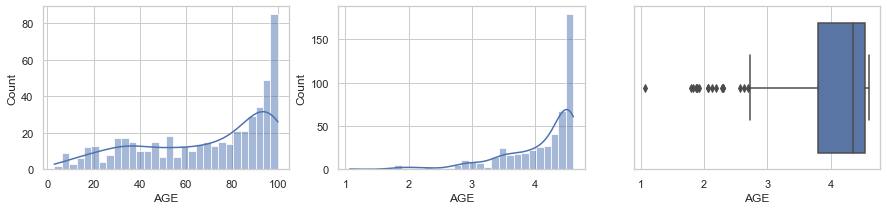

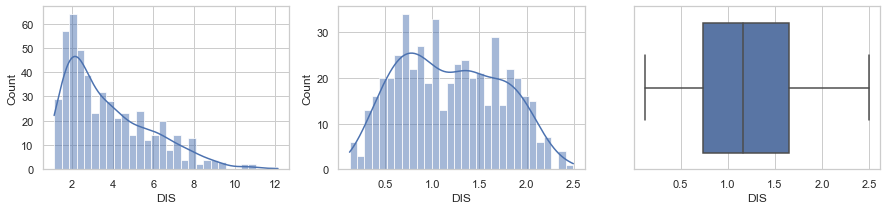

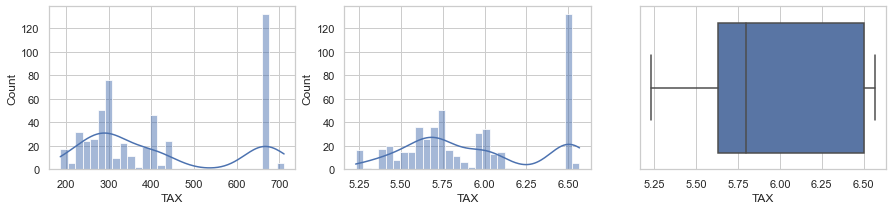

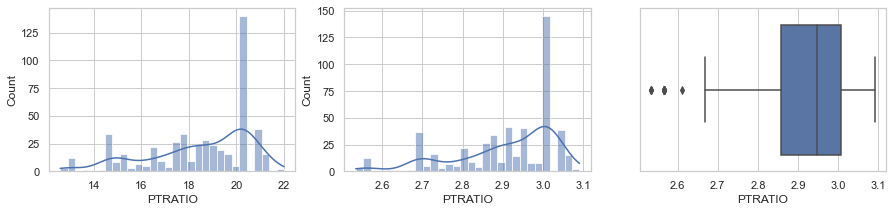

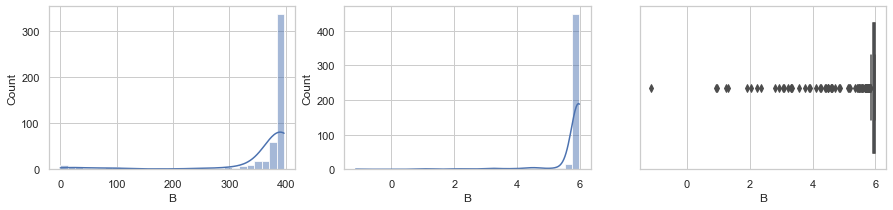

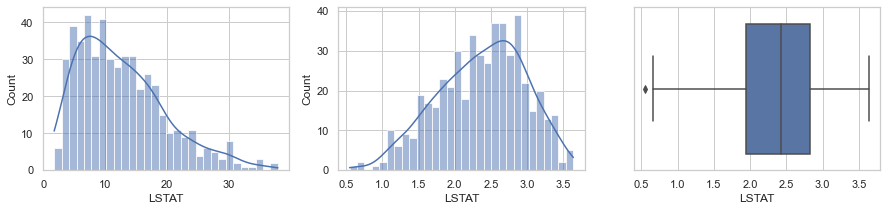

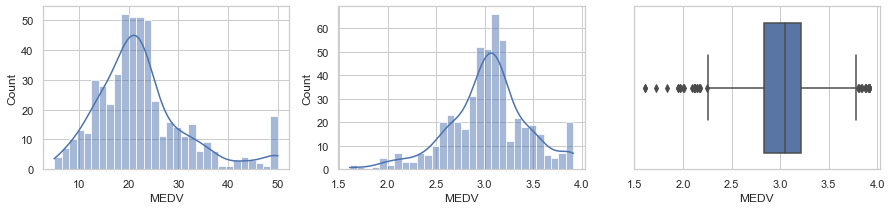

In [9]:
#препроцессинг данных
hist_boxplots(data)

In [10]:
#В3 - логарифм переменных
X = data.drop(['MEDV'], axis = 1)
Y = data['MEDV']
print(f'Размерность массивов: {X.shape, Y.shape}')
#применим логарифм к переменным
for feature in X.columns:
    if feature not in ['RAD', 'CHAS', 'ZN']:
        X[feature] = X[feature].apply(lambda x: np.log(x))
#тестируем модель
evaluating_the_model(X, Y, scal = False, text = 'В3 - логарифм переменных')

Размерность массивов: ((506, 13), (506,))
В3 - логарифм переменных:  MSE 4.2996,  MAE 2.825,  R^2 0.7479


`применение логарифмирования регрессоров привело к улучшению качества модели на 7.39%`  
`логарифмирование уменьшает амплитуду значений переменных и, вероятно, приближает распределение переменных`   
`к нормальному`

In [11]:
#выбросы
data[data['MEDV'] > 38]['MEDV']
#по целевой переменной MEDV есть выбросы, не похоже на ошибки, предположу, что это недвижимость класса LUX

97     38.7
98     43.8
157    41.3
161    50.0
162    50.0
163    50.0
166    50.0
180    39.8
186    50.0
195    50.0
202    42.3
203    48.5
204    50.0
224    44.8
225    50.0
228    46.7
232    41.7
233    48.3
253    42.8
256    44.0
257    50.0
261    43.1
262    48.8
267    50.0
268    43.5
280    45.4
282    46.0
283    50.0
368    50.0
369    50.0
370    50.0
371    50.0
372    50.0
Name: MEDV, dtype: float64

In [12]:
#В4 - LUX, CRIM_c, ZN_c 
X = data.drop(['MEDV'], axis = 1)
Y = data['MEDV']
#добавляю категориальные переменные для следующих регрессоров
X['LUX'] = [0 if x < 38 else 1 for x in data['MEDV']]
X['CRIM_c'] = [0 if x < 42 else 1 for x in data['CRIM']]
X['ZN_c'] = [0 if x < 37 else 1 for x in data['ZN']]
X['LSTAT_c'] = [0 if x < 31 else 1 for x in data['LSTAT']]
print(f'Размерность массивов: {X.shape, Y.shape}')
#тестирую модель
evaluating_the_model(X, Y, scal = False, text = 'В4 - LUX, и др.')

Размерность массивов: ((506, 17), (506,))
В4 - LUX, и др.:  MSE 3.0342,  MAE 2.2104,  R^2 0.8745


`1) добавление фиктивной переменной LUX со значениями 0/1 по пороговому значению стоимости недвижимости "38"`  
`позволило очень сильно повысить качество модели, с 0.6688 до 0.8467`  
`2) добавление ZN_c, CRIM_c, LSTAT_c позволило прибавить еще 2,78%`

In [13]:
#В5 - думми RM
#добавление категориальной переменной для регрессора RM (значения 0/1/2)
def RM_c(row, col):
    if row[col] < 4.9: return 0
    elif row[col] > 7.7: return 2
    else: return 1
X['RM_c'] = X.apply(RM_c, col = 'RM', axis = 1)
#думми-кодирование новой категориальной переменной
X['RM_c'] = X['RM_c'].astype('category')
X = pd.get_dummies(X, drop_first = False)
print(f'Размерность массивов: {X.shape, Y.shape}')
#тестирование модели
evaluating_the_model(X, Y, scal = False, text = 'В5 - думми RM')

Размерность массивов: ((506, 20), (506,))
В5 - думми RM:  MSE 2.868,  MAE 2.1291,  R^2 0.8878


`добавление думми-переменных для RM позволило улучшить качество модели еще на 1,33%`

In [14]:
#В6 - LUX и полином ^2

from sklearn.preprocessing import PolynomialFeatures

#т.к. полиномиальная регрессия есть форма линейной регрессии, попробуем добавить нелинейность в модель;
#возьмем исходный датасет
X = data.drop(['MEDV'], axis = 1)
Y = data['MEDV']
#применим к нему алгоритм выделения недвижимости LUX класса
X['LUX'] = [0 if x < 38 else 1 for x in data['MEDV']]
#возьмем полином степени 2
X_poly = PolynomialFeatures(2, interaction_only=True, include_bias=False).fit_transform(X) 
print(f'Размерность массивов: {X_poly.shape, Y.shape}')
#тестирование модели
evaluating_the_model(X_poly, Y, scal = False, text = 'В6 - LUX и полином ^2')

Размерность массивов: ((506, 105), (506,))
В6 - LUX и полином ^2:  MSE 2.478,  MAE 1.9334,  R^2 0.9163


In [15]:
#попробуем объяснить успешное применение полиномиальности
#посмотрим точечные графики для регрессоров, наиболее коррелированных с целевой переменной
#это LSTAT (-0.73) и RM (0.69)
data.corr()['MEDV']

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
MEDV       1.000000
Name: MEDV, dtype: float64

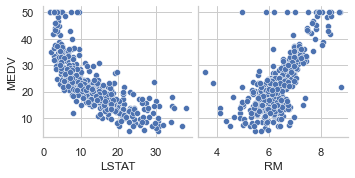

In [16]:
sns.pairplot(data, y_vars = ['MEDV'], x_vars = ['LSTAT', 'RM'])

`для RM зависимость похожа на линейную, для LSTAT зависимость явно нелинейная`

In [17]:
metrics

{'В1 - "в лоб"': {'MSE': 4.9286, 'MAE': 3.1891, 'R^2': 0.6688},
 'В2 - "в лоб" с нормализацией': {'MSE': 5.2352, 'MAE': 3.8526, 'R^2': 0.6263},
 'В3 - логарифм переменных': {'MSE': 4.2996, 'MAE': 2.825, 'R^2': 0.7479},
 'В4 - LUX, и др.': {'MSE': 3.0342, 'MAE': 2.2104, 'R^2': 0.8745},
 'В5 - думми RM': {'MSE': 2.868, 'MAE': 2.1291, 'R^2': 0.8878},
 'В6 - LUX и полином ^2': {'MSE': 2.478, 'MAE': 1.9334, 'R^2': 0.9163}}

`Вывод:`  
`1) применять модели без препроцессинга данных - не самая хорошая идея`  
`2) нормализация регрессоров не всегда улучшает результат`  
`3) анализ данных на предмет выявления выбросов на этапе препроцессинга может дать положительный`  
`эффект (как, например, анализ выбросов в целевой переменной позволил сделать вывод о принадлежности этих`  
`выбросов к классу LUX, что через добавление фиктивной переменной 0/1 позволило улучшить качество модели`  
`почти на 20%)`  
`4) анализ попарной зависимости целевой переменной от регрессоров также может дать подсказки о необходимости`  
`применения тех или иных методов улучшения качества модели (как, например, наличие нелинейной зависимости`  
`целевой переменной от LSTAT)`